In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
from collections import Counter

In [2]:
con = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='sri123',
    database='gamessales'
)

In [3]:
games = pd.read_sql("select * from games", con)

In [4]:
sales = pd.read_sql("select * from sales", con)

In [5]:
#Load Dataset From Sql

query_games = "select * from games"
query_sales = "select * from sales"

In [6]:
games = pd.read_sql(query_games, con)
sales = pd.read_sql(query_sales, con)

In [7]:
#Merge The dataframe

# Merge the datasets
merged_df = pd.merge(
    sales, games,
    left_on=["rank"],
    right_on=["s_no"],
    how="inner"
)
merged_df.fillna(0, inplace=True)

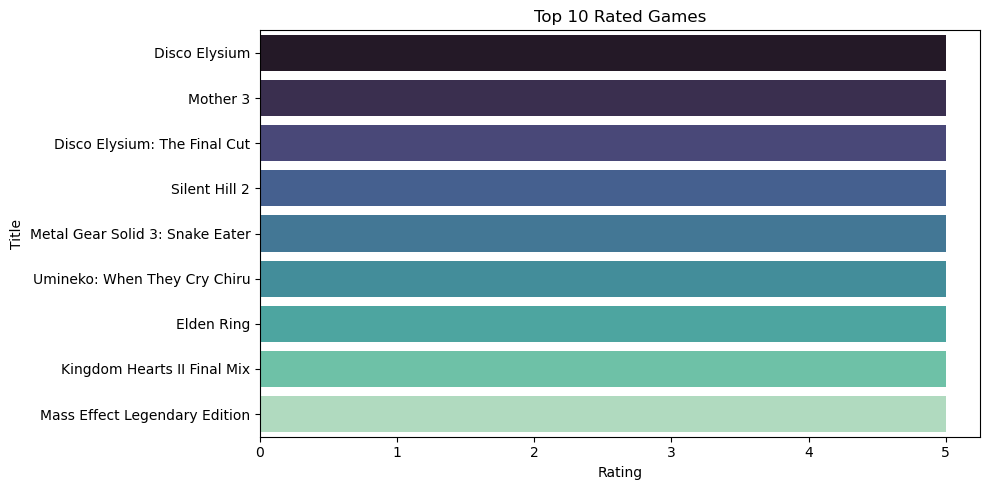

In [8]:
# What are the top-rated games by user reviews?

top_rated = games.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='rating', y='title', data=top_rated, palette='mako')
plt.title("Top 10 Rated Games")
plt.xlabel("Rating")
plt.ylabel("Title")
plt.tight_layout()
plt.show()

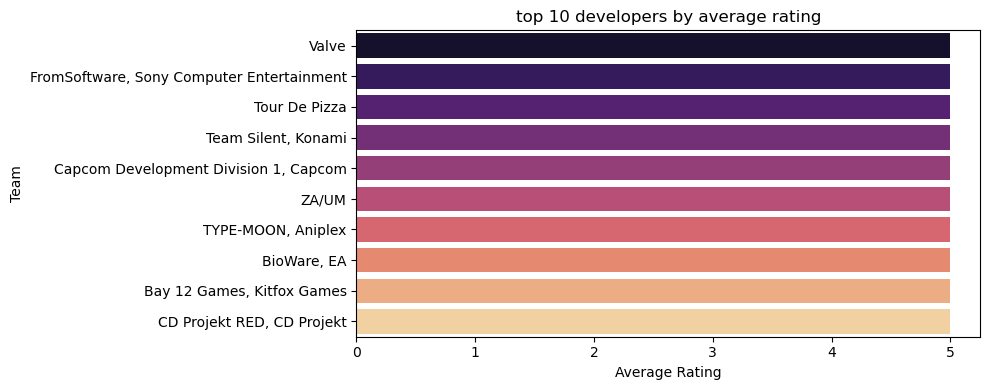

In [9]:
#Which developers (Teams) have the highest average ratings?
 
Top_Developers = games.groupby('team')['rating'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='rating', y='team', data=Top_Developers, palette='magma')
plt.title('top 10 developers by average rating')
plt.xlabel('Average Rating')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

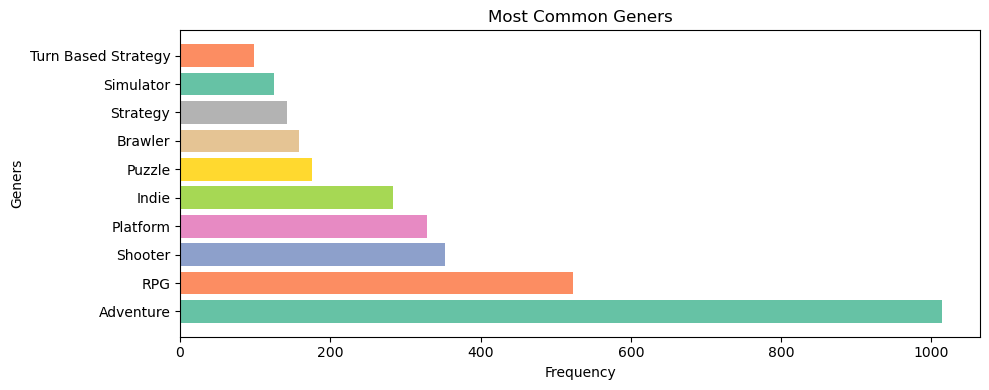

In [10]:
#What are the most common genres in the dataset?

all_geners = games['genres'].dropna().str.split(', ')
gener_counts = Counter([gener for sublist in all_geners for gener in sublist])
gener_df = pd.DataFrame(gener_counts.items(), columns=['Gener', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(10,4))
plt.barh(y='Gener', width='Count', data=gener_df.head(10), color=plt.cm.Set2.colors)
plt.title('Most Common Geners')
plt.xlabel('Frequency')
plt.ylabel('Geners')
plt.tight_layout()
plt.show()

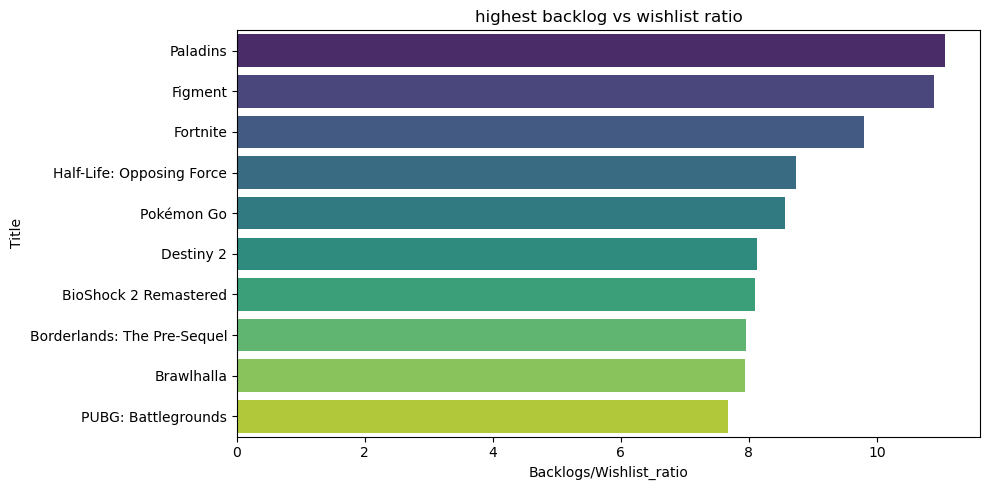

In [11]:
#4. Which games with highest backlog vs wishlist ratio

games['backlogs/wishlist_ratio'] = games['backlogs'] / ( games['wishlist'] + 1 )
top_backlog_ratio = games.sort_values(by = 'backlogs/wishlist_ratio', ascending = False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='backlogs/wishlist_ratio', y='title', data=top_backlog_ratio, palette='viridis')
plt.title('highest backlog vs wishlist ratio')
plt.xlabel('Backlogs/Wishlist_ratio')
plt.ylabel('Title')
plt.tight_layout()
plt.show()

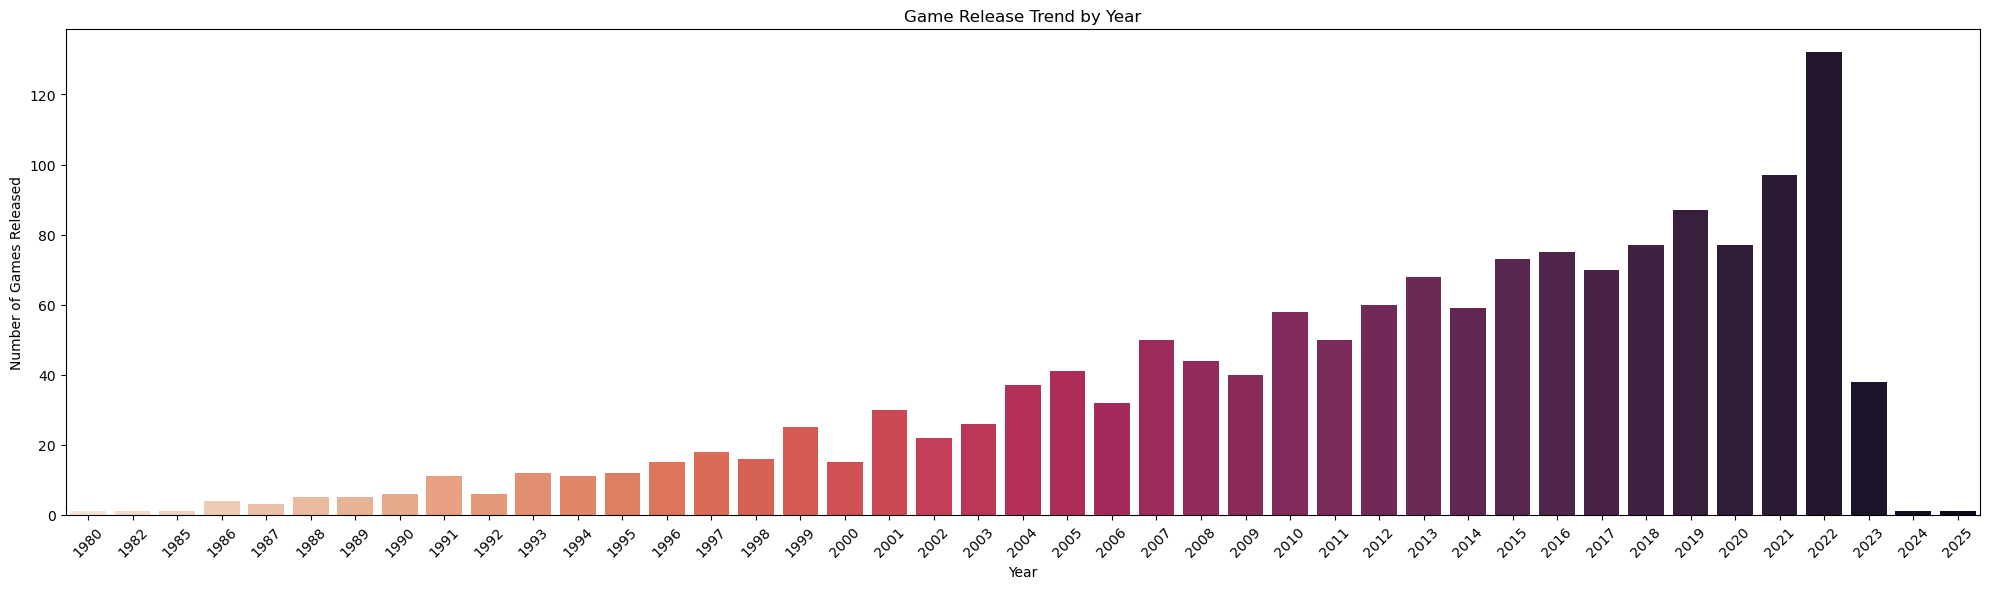

In [12]:
# What is the game release trend across years?

games['release_date'] = pd.to_datetime(games['release_date'], errors='coerce')
games['year'] = games['release_date'].dt.year
release_trend = games['year'].dropna().value_counts().sort_index()

plt.figure(figsize=(20, 6))
sns.barplot(x=release_trend.index.astype(int), y=release_trend.values, palette='rocket_r')
plt.title('Game Release Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

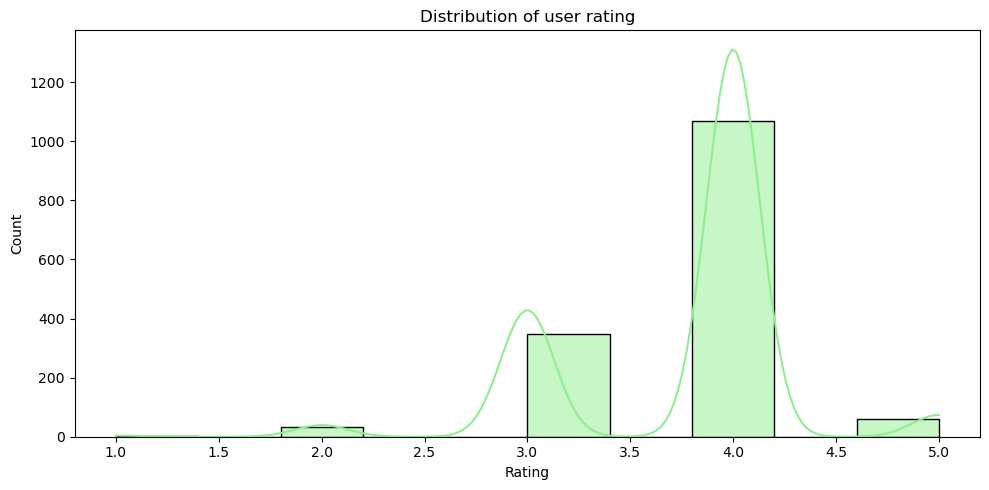

In [13]:
# What is the distribution of user ratings

plt.figure(figsize=(10, 5))
sns.histplot(games['rating'].dropna(), bins=10, kde=True, color='lightgreen')
plt.title('Distribution of user rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

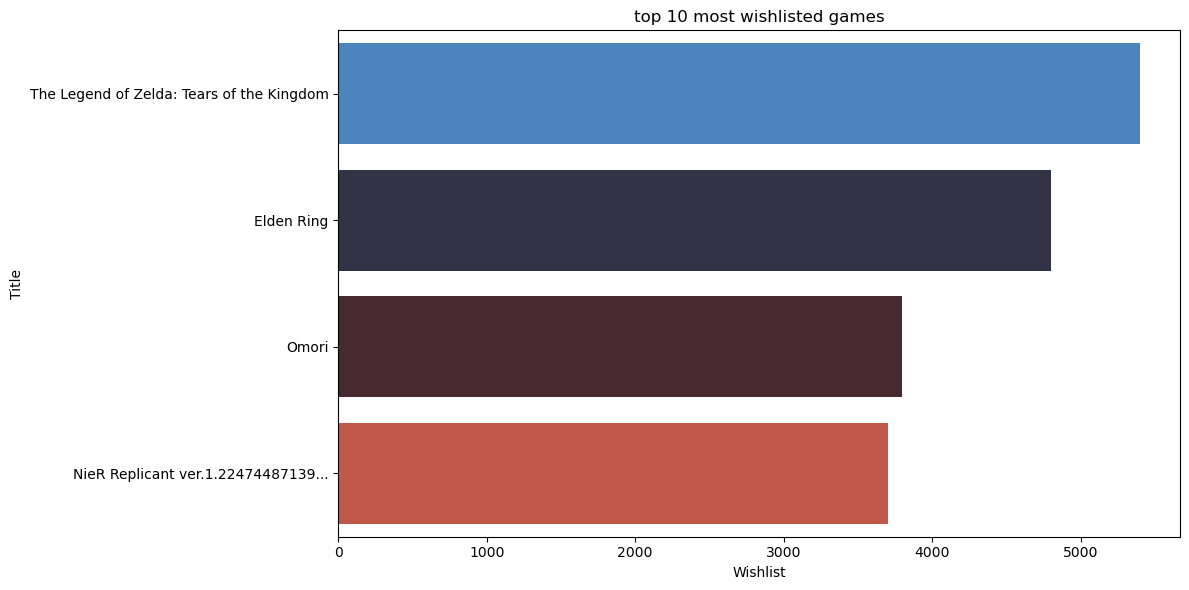

In [14]:
# What are the top 10 most wishlisted games?

top_wishlist = games.sort_values(by='wishlist', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='wishlist', y='title', data=top_wishlist, palette='icefire')
plt.title('top 10 most wishlisted games')
plt.xlabel('Wishlist')
plt.ylabel('Title')
plt.tight_layout()
plt.show()

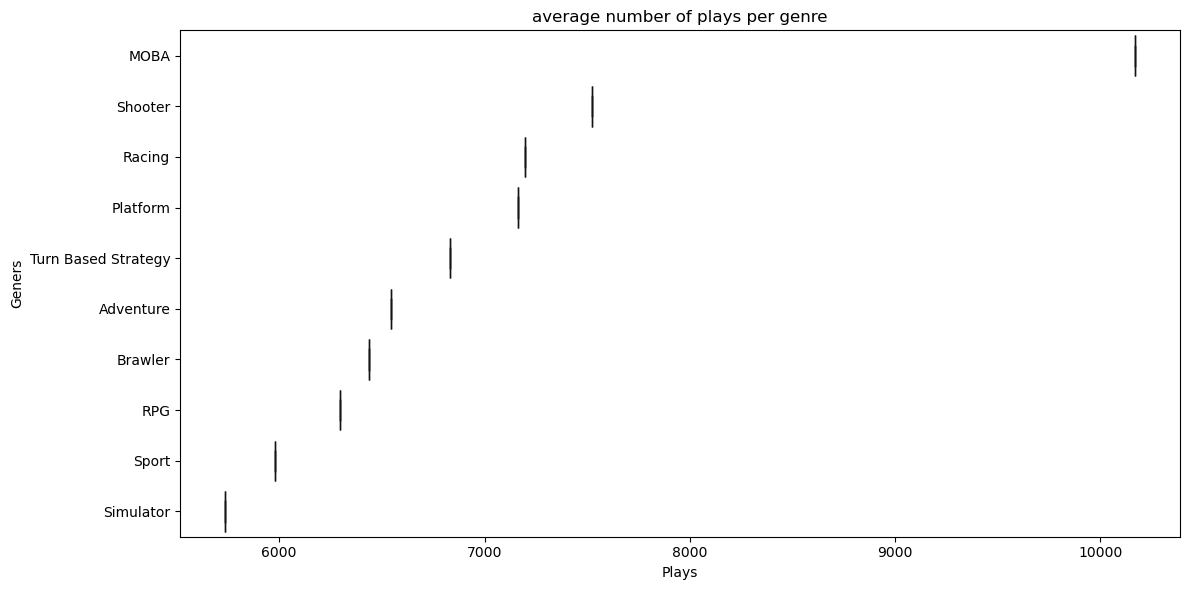

In [15]:
# What’s the average number of plays per genre?

exploded = games.dropna(subset=['genres','plays']).copy()
exploded['genres'] = exploded['genres'].str.split(', ')
exploded = exploded.explode('genres')
avg_play = exploded.groupby('genres')['plays'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(x='plays', y='genres', data=avg_play.head(10), palette='rocket')
plt.title('average number of plays per genre')
plt.xlabel('Plays')
plt.ylabel('Geners')
plt.tight_layout()
plt.show()

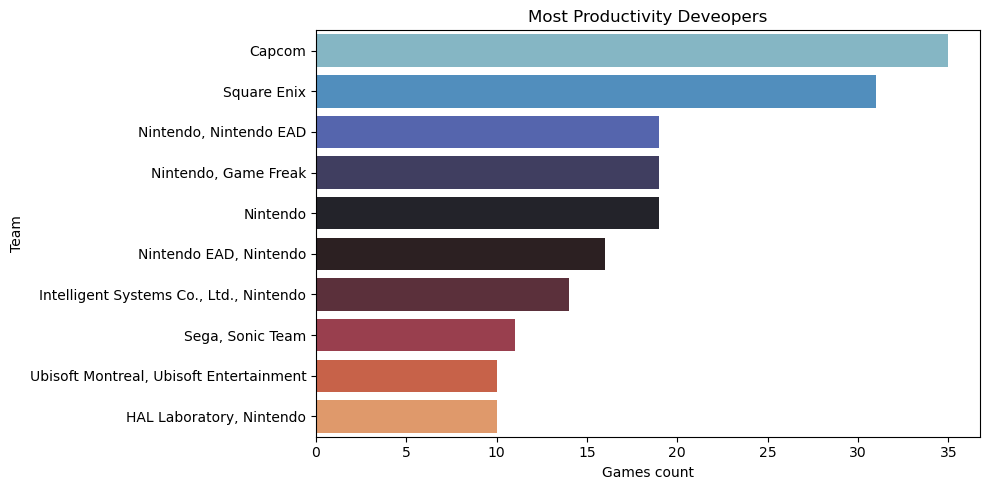

In [16]:
# Most productive developers by number of games

productivity = games['team'].value_counts().head(10).reset_index()
productivity_columns = ['teams', 'count']
plt.figure(figsize=(10,5))
sns.barplot(x='count', y='team', data=productivity, palette='icefire')
plt.title('Most Productivity Deveopers')
plt.xlabel('Games count')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

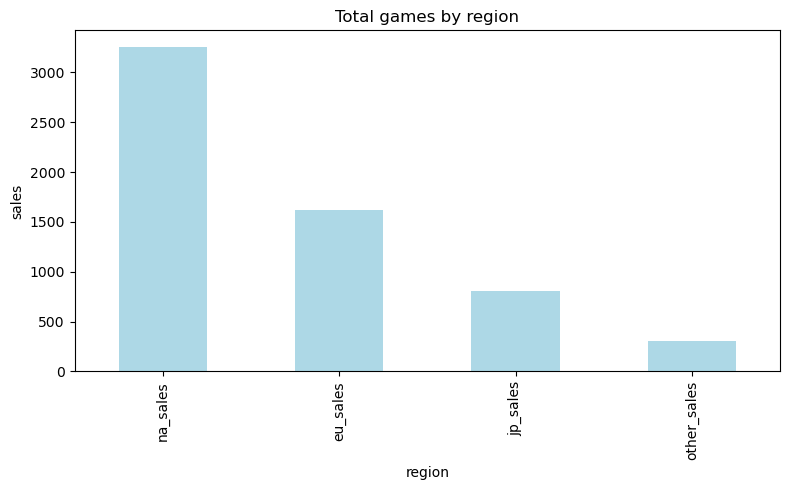

In [17]:
# Which region generates the most game sales?

region_total = sales[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
plt.figure(figsize=(8,5))
region_total.plot(kind='bar', color='lightblue')

plt.title('Total games by region')
plt.xlabel('region')
plt.ylabel('sales')
plt.tight_layout()
plt.show()

[]

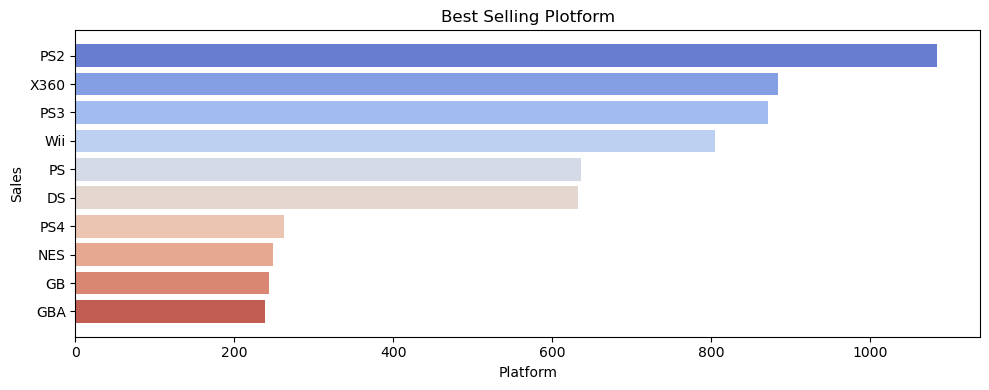

In [18]:
# What are the best-selling platforms?

best_selling = sales.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='global_sales', y='platform', data = best_selling, palette='coolwarm')
plt.title('Best Selling Plotform')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.tight_layout()
plt.plot()

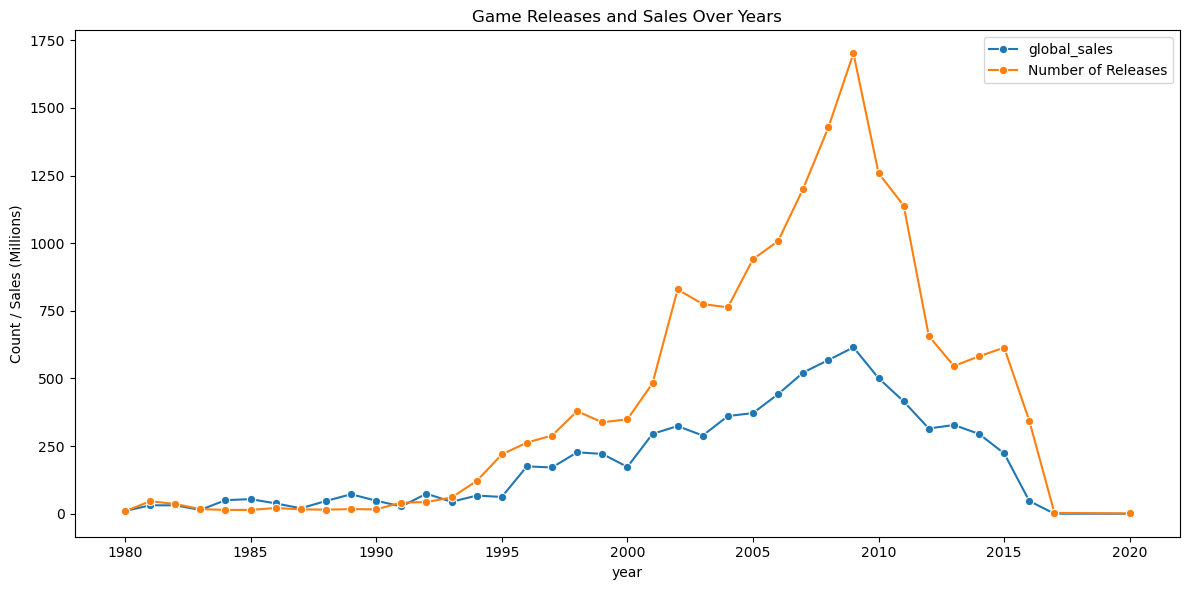

In [20]:
# What’s the trend of game releases and sales over years?

sales['year'] = pd.to_numeric(sales['year'], errors='coerce')
trend = sales.groupby('year').agg({'name': 'count', 'global_sales': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='global_sales', data=trend, label='global_sales', marker='o')
sns.lineplot(x='year', y='name', data=trend, label='Number of Releases', marker='o')
plt.title('Game Releases and Sales Over Years')
plt.ylabel('Count / Sales (Millions)')
plt.tight_layout()
plt.show()

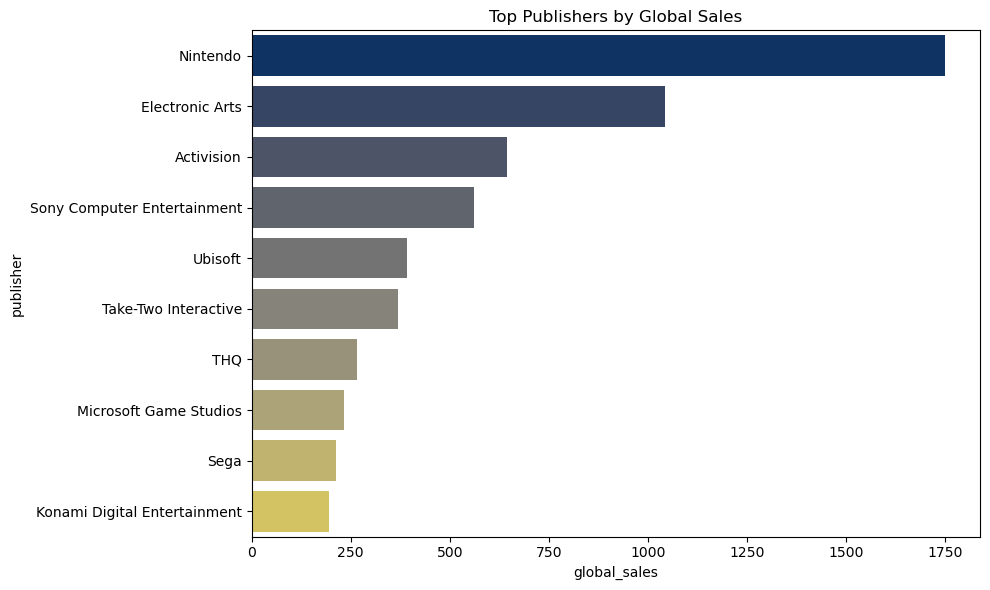

In [21]:
# 13. Top publishers by sales

top_publishers = sales.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='global_sales', y='publisher', data=top_publishers, palette='cividis')
plt.title('Top Publishers by Global Sales')
plt.tight_layout()
plt.show()

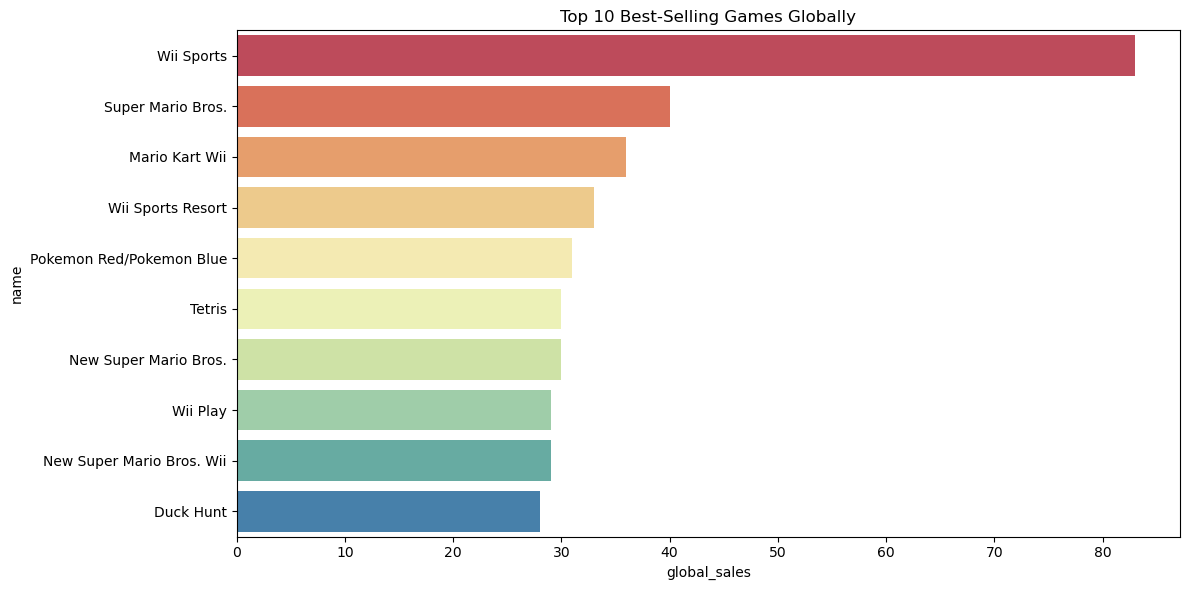

In [22]:
# 14. Top 10 best-selling games globally

top_games = sales.sort_values(by='global_sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='global_sales', y='name', data=top_games, palette='Spectral')
plt.title('Top 10 Best-Selling Games Globally')
plt.tight_layout()
plt.show()

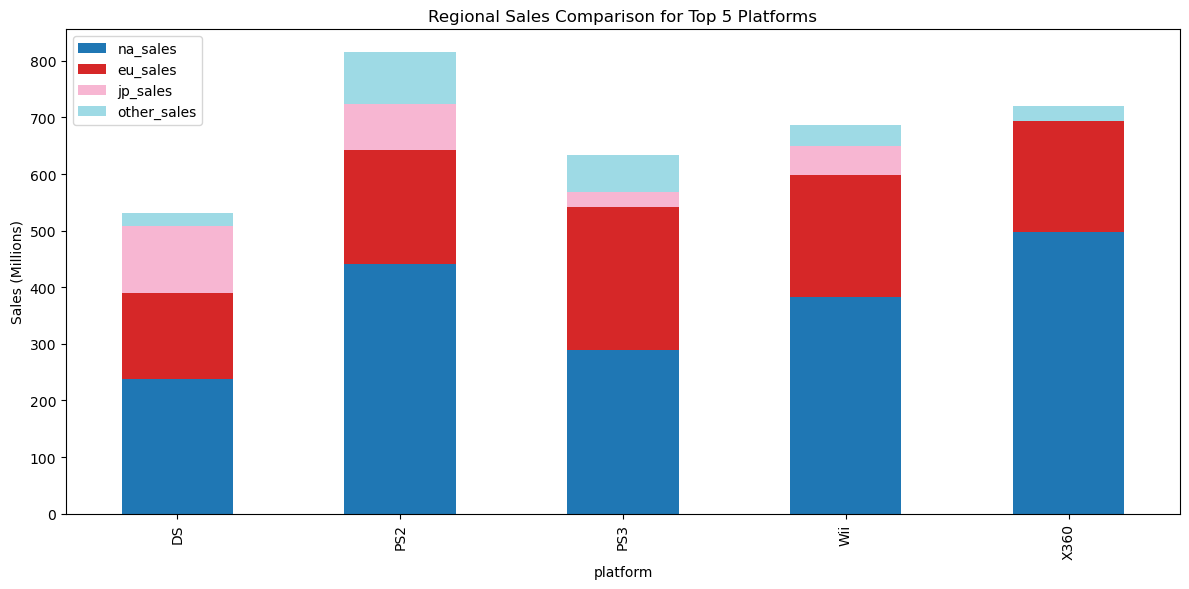

In [23]:
# 15. Regional sales comparison for top 5 platforms

top5_platforms = sales['platform'].value_counts().head(5).index
regional = sales[sales['platform'].isin(top5_platforms)]
regional_grouped = regional.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

regional_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Regional Sales Comparison for Top 5 Platforms')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()

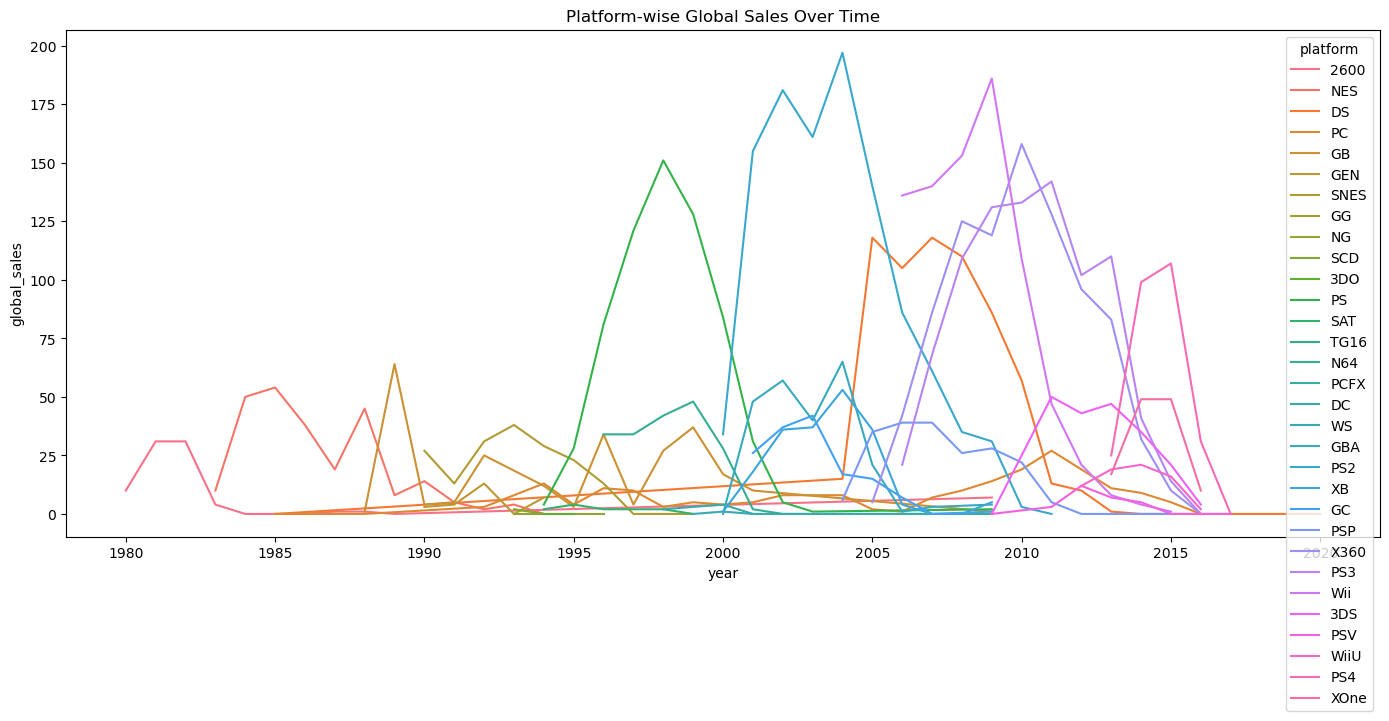

In [25]:
# 16. Market evolution by platform over time

evo = sales.groupby(['year', 'platform'])['global_sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='global_sales', hue='platform', data=evo)
plt.title('Platform-wise Global Sales Over Time')
plt.tight_layout()
plt.show()

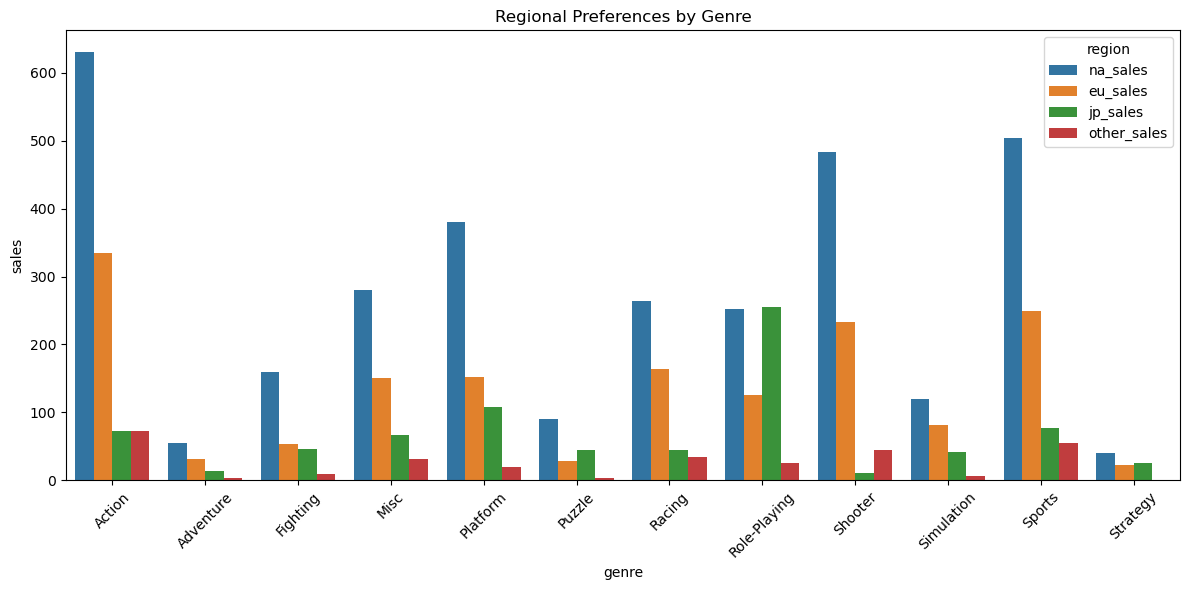

In [26]:
# 17. Regional genre preferences

region_genre = sales.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
region_genre_melted = region_genre.melt(id_vars='genre', var_name='region', value_name='sales')

plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='sales', hue='region', data=region_genre_melted)
plt.xticks(rotation=45)
plt.title('Regional Preferences by Genre')
plt.tight_layout()
plt.show()

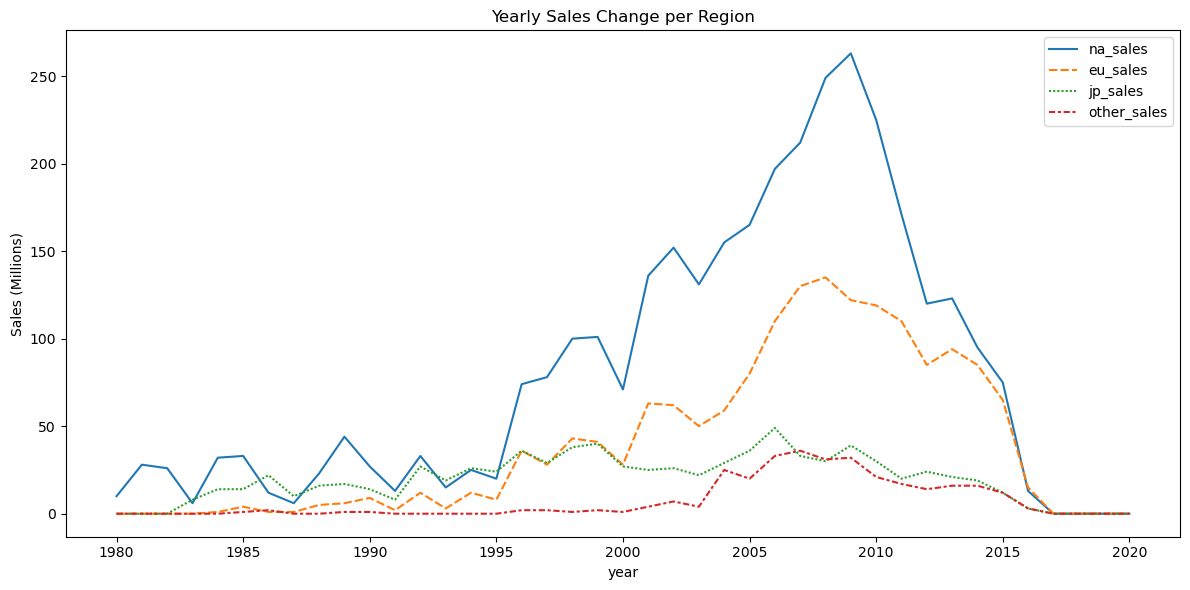

In [27]:
# 18. Yearly sales change per region

year_region = sales.groupby('year')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_region.set_index('year'))
plt.title('Yearly Sales Change per Region')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()

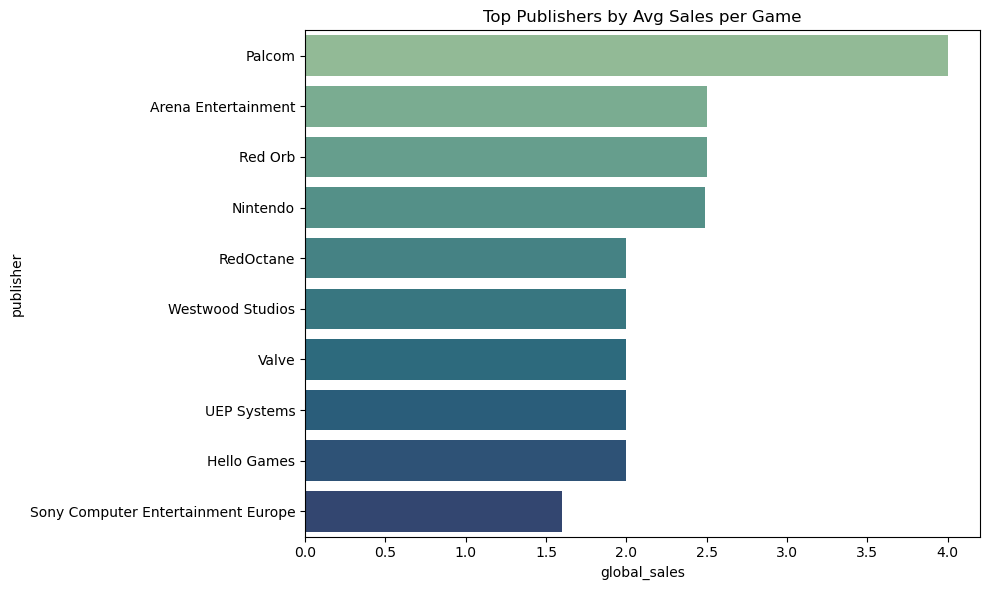

In [28]:
# 19. Average sales per publisher

avg_sales = sales.groupby('publisher')['global_sales'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='global_sales', y='publisher', data=avg_sales, palette='crest')
plt.title('Top Publishers by Avg Sales per Game')
plt.tight_layout()
plt.show()

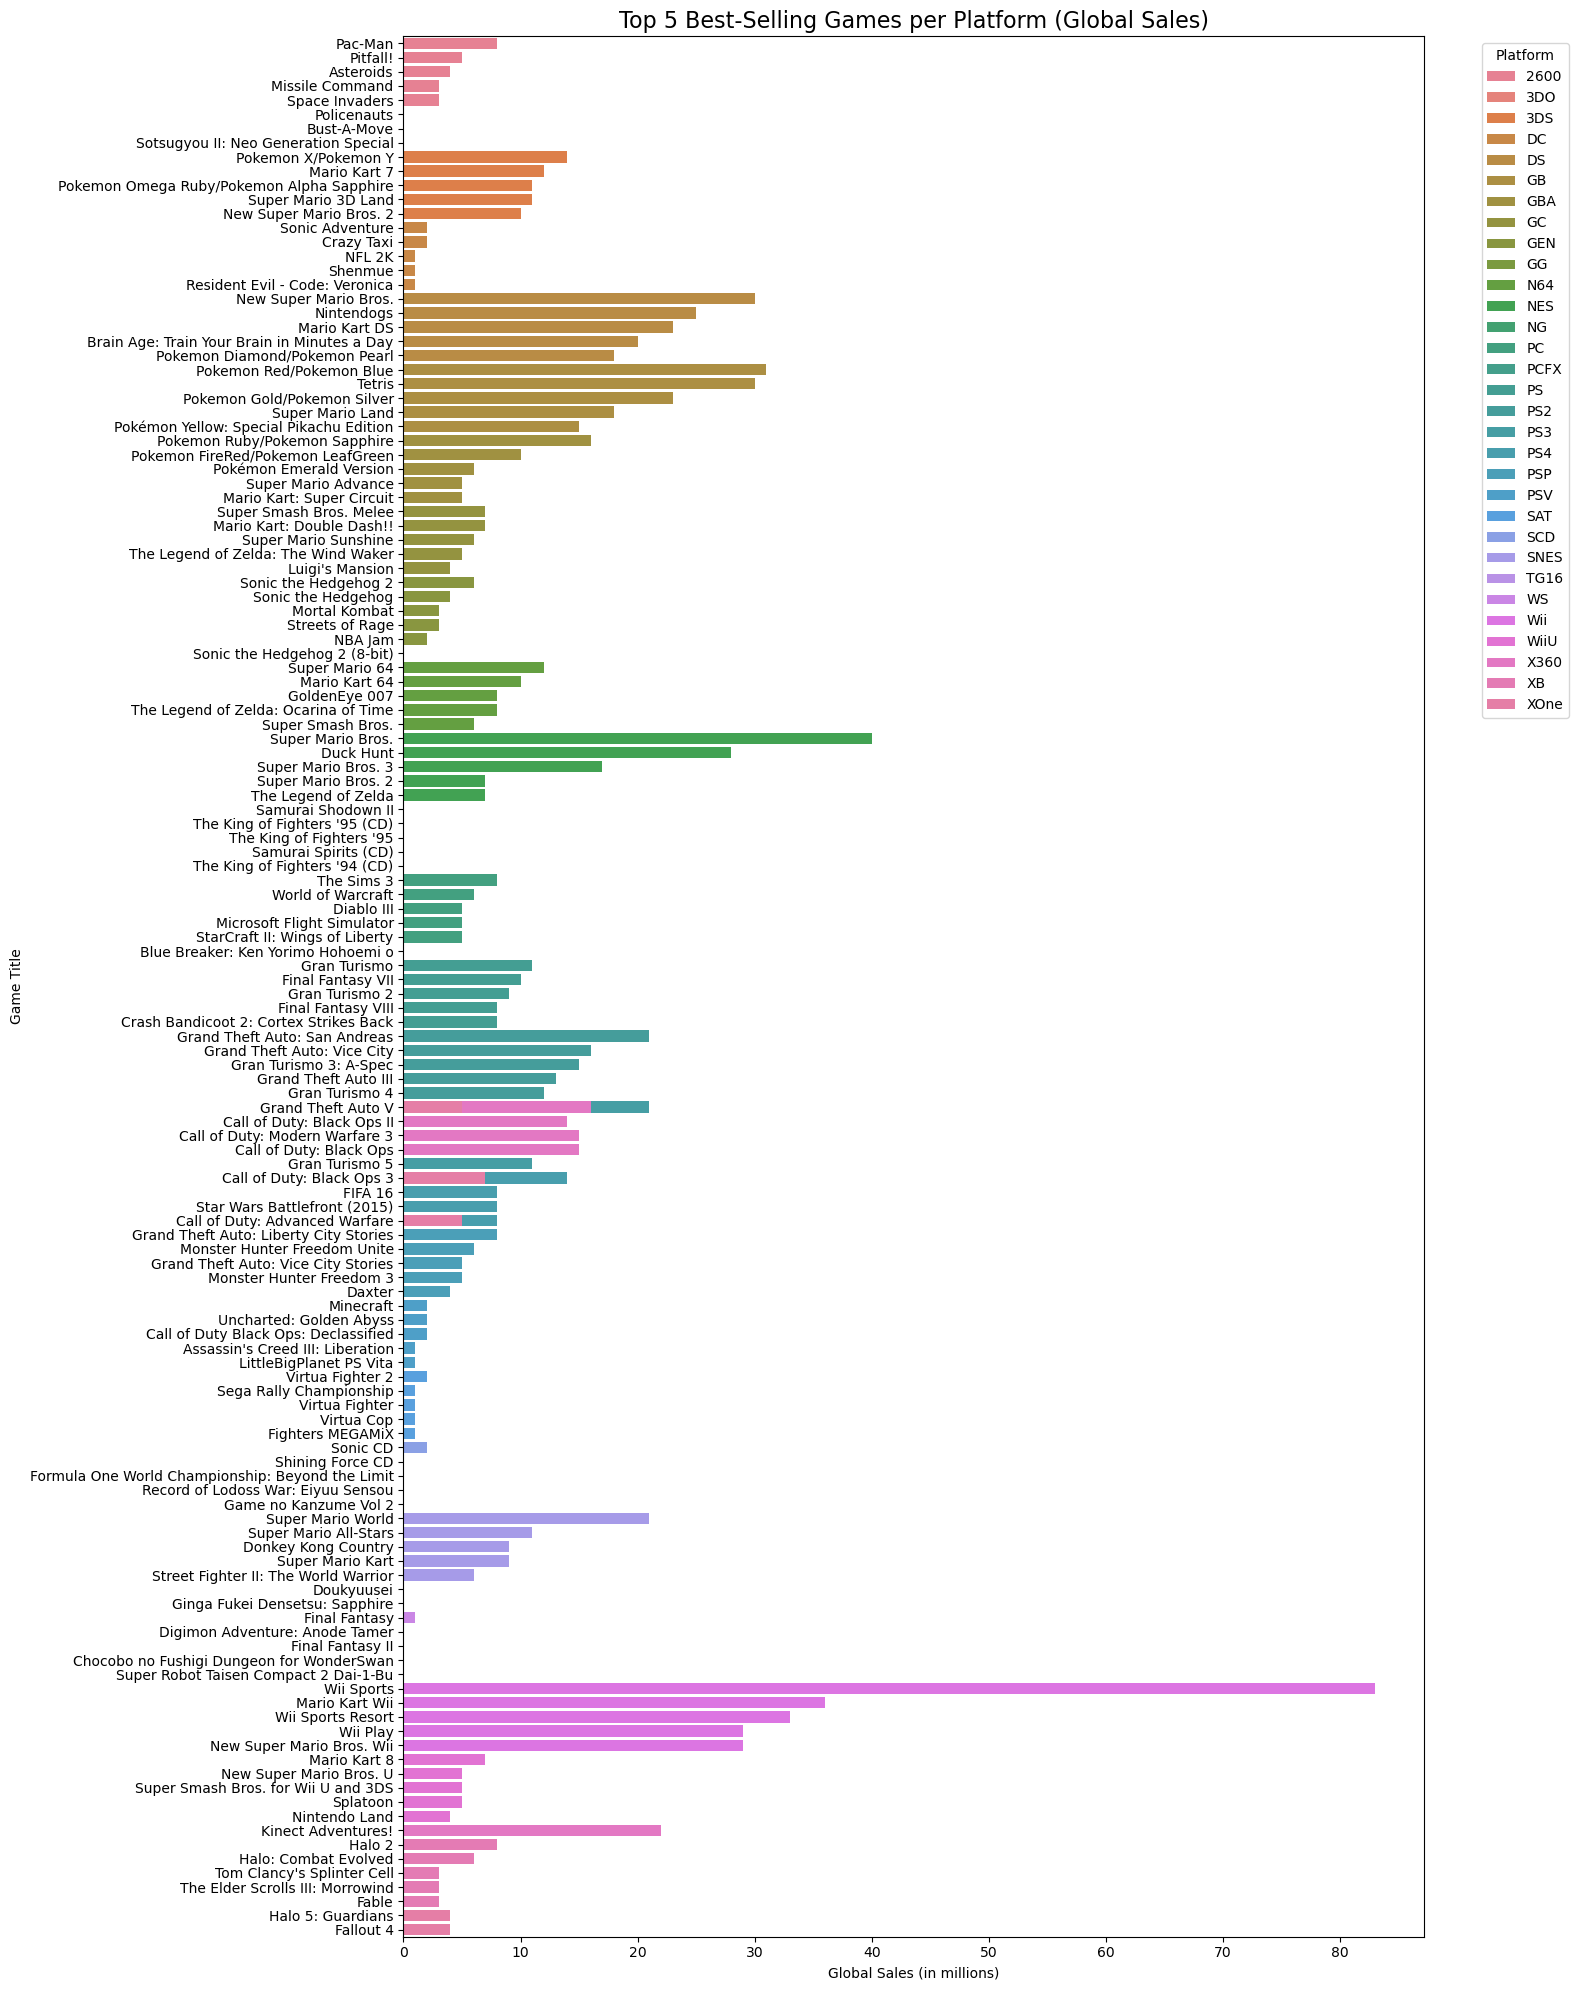

In [29]:
# 20. Top 5 best-selling games per platform
top5_games = sales.groupby('platform').apply(lambda x: x.nlargest(5, 'global_sales')).reset_index(drop=True)

# Set the plot style
plt.figure(figsize=(16, 20))
sns.barplot(data=top5_games, x='global_sales', y='name', hue='platform', dodge=False)

# Formatting
plt.title('Top 5 Best-Selling Games per Platform (Global Sales)', fontsize=16)
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Title')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

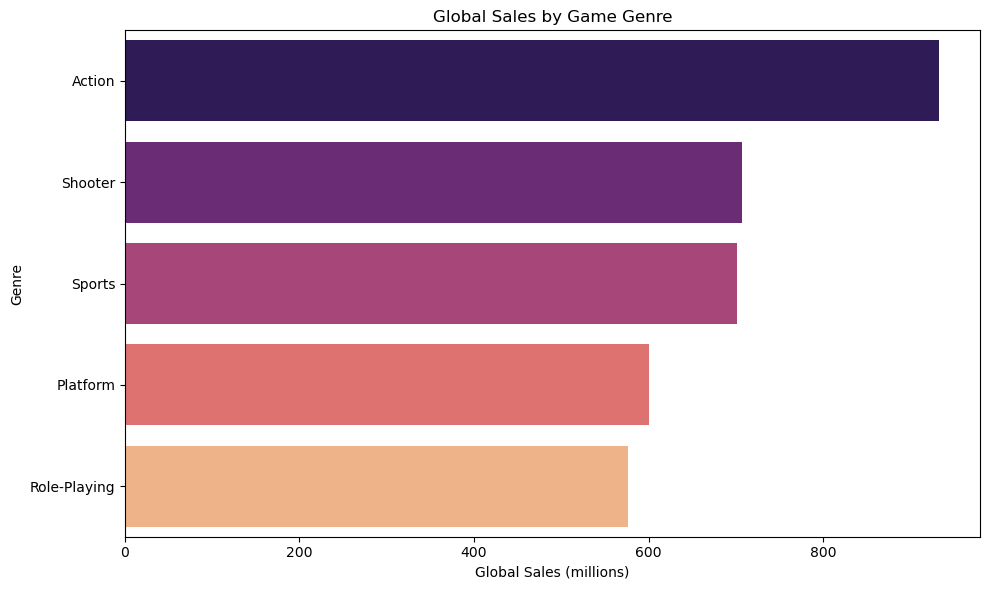

In [30]:
# 21. Which game genres generate the most global sales?

genre_sales = merged_df.groupby('genre')['global_sales'].sum().sort_values(ascending=False).head()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='magma')
plt.title("Global Sales by Game Genre")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

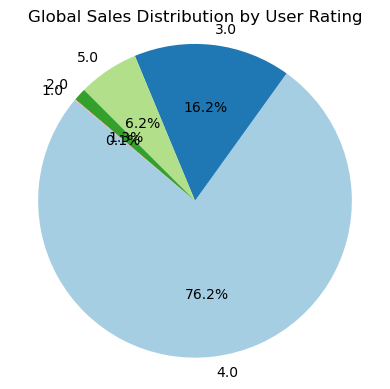

In [31]:
# 22. How does user rating affect global sales?
rating_sales = merged_df.groupby('rating')['global_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(4, 4))
plt.pie(rating_sales, labels=rating_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Global Sales Distribution by User Rating')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [32]:
# 23. Platforms with most games rated above 4

high_rating_platform_df = merged_df[merged_df["rating"] > 4].groupby("platform")["rating"].count().sort_values(ascending=False).reset_index(name="High_Rated_Count")
print("\n🕹️ Platforms with Most Games Rating > 4")
print(high_rating_platform_df)


🕹️ Platforms with Most Games Rating > 4
   platform  High_Rated_Count
0       PS2                11
1      X360                 8
2        GC                 6
3       PS3                 6
4       Wii                 5
5        DS                 5
6        PS                 4
7       PS4                 3
8       PSP                 3
9       GBA                 2
10       GB                 2
11      3DS                 1
12       PC                 1
13      NES                 1
14      N64                 1
15       XB                 1


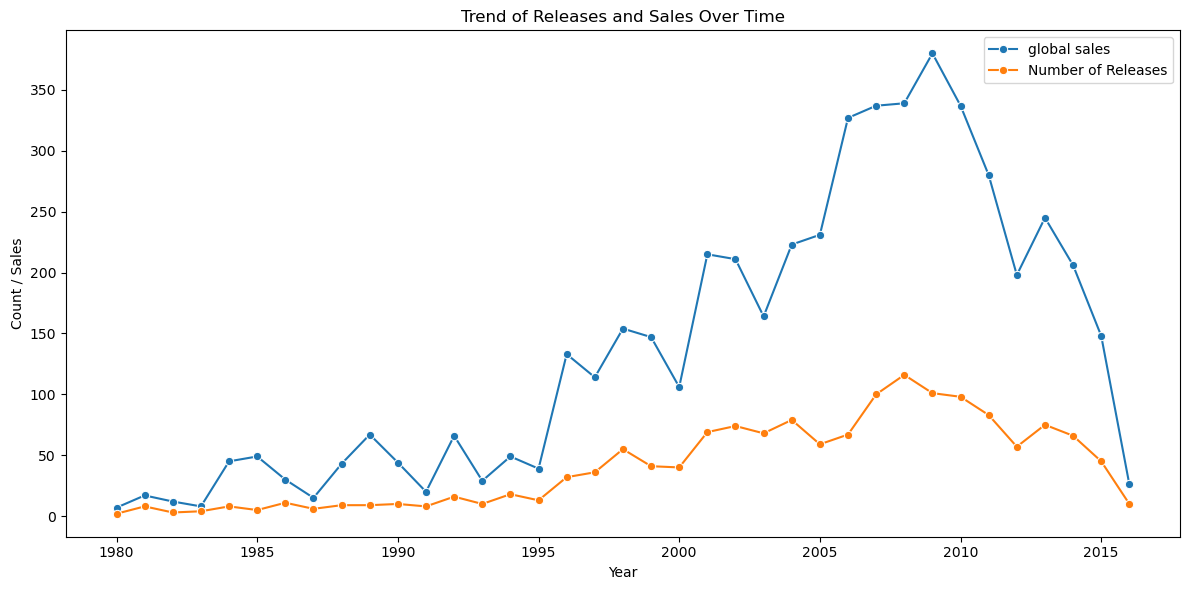

In [33]:
# 24. Trend of releases and sales over time

trend = merged_df.groupby('year').agg({'title':'count', 'global_sales':'sum'}).reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x='year', y='global_sales', label='global sales', marker='o')
sns.lineplot(data=trend, x='year', y='title', label='Number of Releases', marker='o')
plt.title("Trend of Releases and Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Count / Sales")
plt.tight_layout()
plt.show()

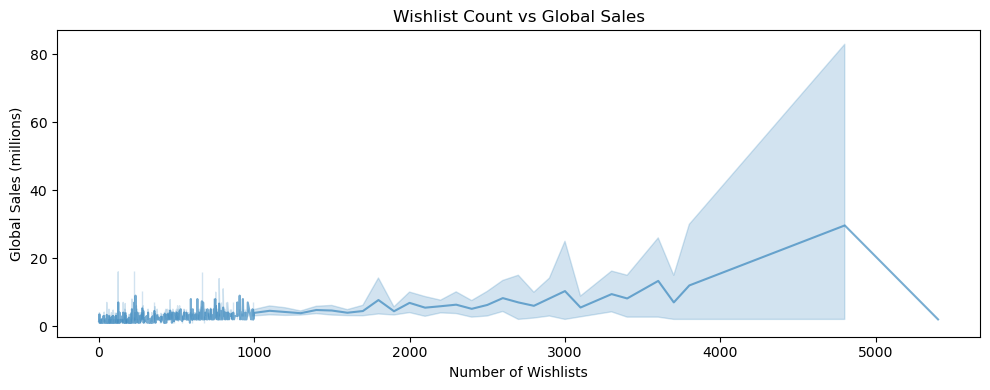

In [34]:
# 25. Do highly wishlisted games lead to more sales?

plt.figure(figsize=(10,4))
sns.lineplot(data=merged_df, x='wishlist', y='global_sales', alpha=0.6)
plt.title("Wishlist Count vs Global Sales")
plt.xlabel("Number of Wishlists")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

In [36]:
# 26. Genres with highest engagement but lowest sales

merged_df["Engagement"] = merged_df["plays"] + merged_df["backlogs"] + merged_df["wishlist"]
genre_engage_sales_df = merged_df.groupby("genre")[["Engagement", "global_sales"]].mean().sort_values(by="Engagement", ascending=False).reset_index()
print("\n🎮 High Engagement, Low Sales by Genre")
print(genre_engage_sales_df)


🎮 High Engagement, Low Sales by Genre
           genre   Engagement  global_sales
0        Shooter  9135.768041      3.644330
1       Platform  9010.662069      4.137931
2   Role-Playing  9000.608974      3.692308
3         Racing  8812.214876      3.429752
4     Simulation  8700.984127      3.111111
5         Action  8446.529605      3.069079
6           Misc  8438.046154      3.284615
7       Strategy  8148.000000      2.521739
8         Puzzle  8115.702703      3.702703
9         Sports  7865.732719      3.230415
10      Fighting  7597.739130      2.554348
11     Adventure  5900.724138      2.620690


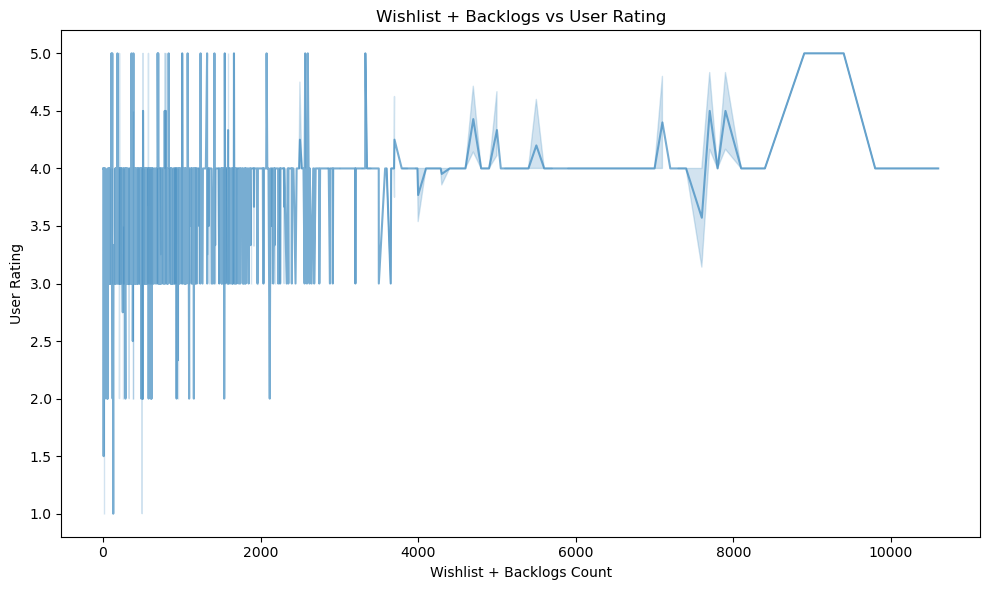

In [37]:
# 27. Correlation between wishlist/backlogs and ratings

plt.figure(figsize=(10,6))
sns.lineplot(data=merged_df, x=merged_df['wishlist'] + merged_df['backlogs'], y='rating', alpha=0.6)
plt.title("Wishlist + Backlogs vs User Rating")
plt.xlabel("Wishlist + Backlogs Count")
plt.ylabel("User Rating")
plt.tight_layout()
plt.show()


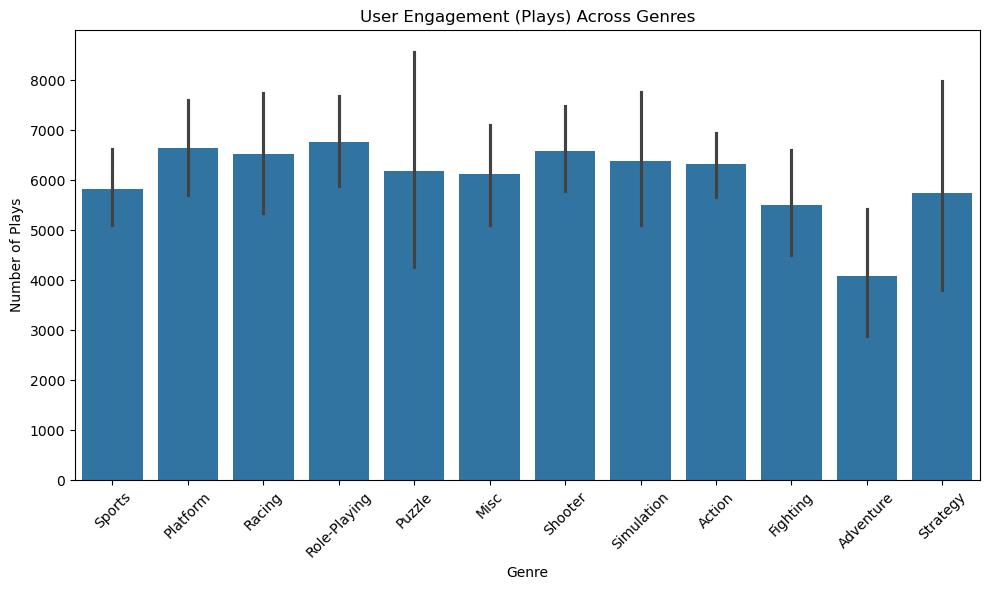

In [38]:
# 28. User engagement difference across genres

plt.figure(figsize=(10,6))
sns.barplot(data=merged_df, x='genre', y='plays')
plt.title("User Engagement (Plays) Across Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Plays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

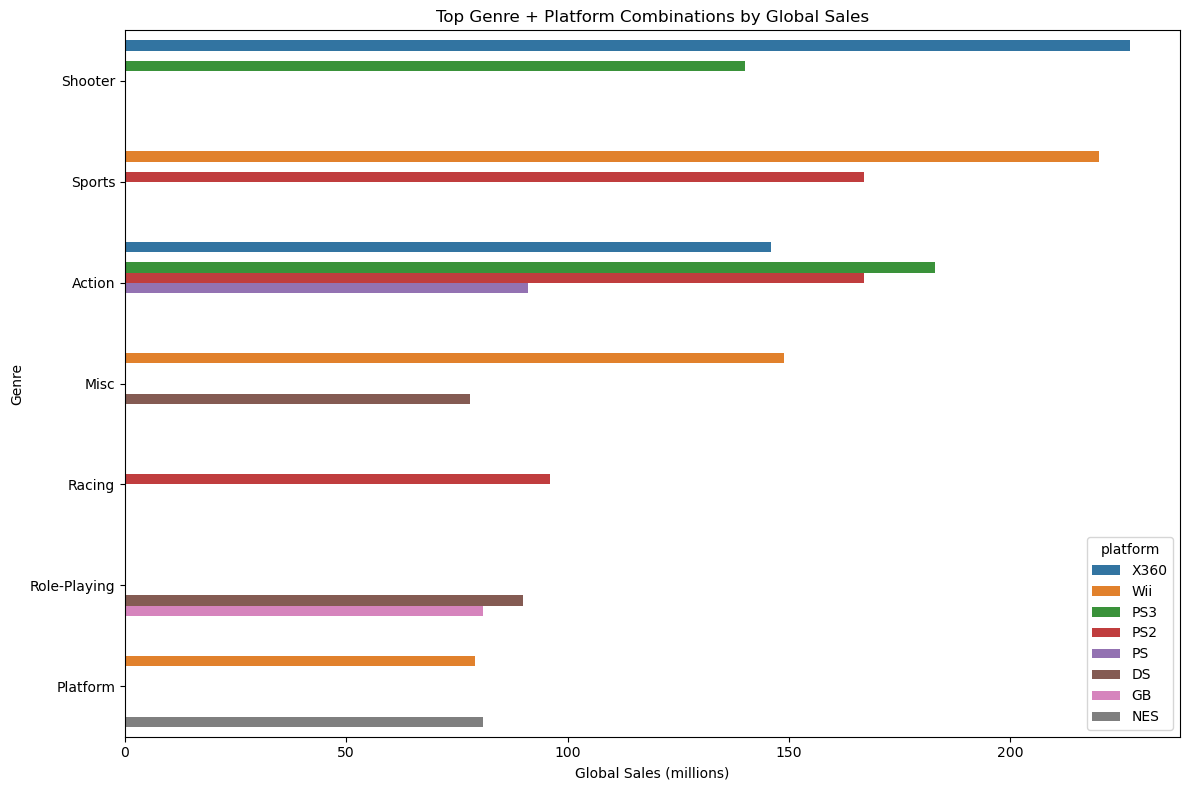

In [39]:
# 29. Top performing Genre + Platform combinations

combo = merged_df.groupby(['genre', 'platform'])['global_sales'].sum().reset_index()
top_combo = combo.sort_values(by='global_sales', ascending=False).head(15)

plt.figure(figsize=(12,8))
sns.barplot(data=top_combo, x='global_sales', y='genre', hue='platform')
plt.title("Top Genre + Platform Combinations by Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

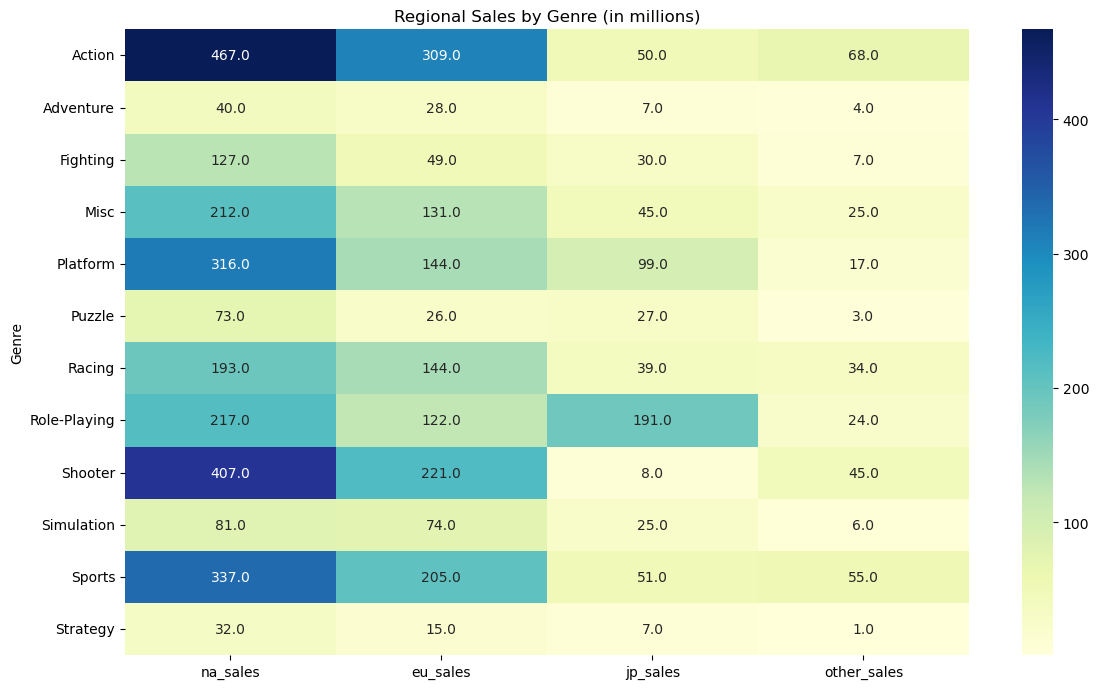

In [40]:
# 30. Regional sales heatmap by genre

region_sales = merged_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

plt.figure(figsize=(12,7))
sns.heatmap(region_sales, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Regional Sales by Genre (in millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()
